In [1]:
##############################################################################################################
# DESCRIPTION: 
#              
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

class HyperParams:
    pass

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/"

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 70 # 600 #10000
hyperparams.BATCH_SIZE = 16
hyperparams.START_NEURONS = 8 # UNET
hyperparams.LOSS = 'mae_nz'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0100_1000"
SAVED_MODEL = "0100_1000-64-d"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', SAVED_MODEL))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0898
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3248

#from tensorflow.keras.optimizers import Adam
#hyperparams.OPTIMIZER = Adam(learning_rate=0.0001)
from tensorflow.keras.optimizers import Nadam
hyperparams.OPTIMIZER = Nadam(learning_rate=0.0001)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
from tensorflow.compat.v1 import InteractiveSession

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelB as train
import ReportsK as reports
import UnetI as model_factory

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

print(f"Tensorflow version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

tf.config.list_physical_devices('GPU')

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12528091357301249424
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5722079232
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6536691154041294172
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6"
]
Tensorflow version: 2.6.0
Keras Version: 2.6.0
GPU is available


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
##################
# MODEL DEFINITION
##################

model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 8)    80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 8)    584         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 32, 32, 8)    0           conv2d_1[0][0]                   
______________________________________________________________________________________________

{'name': 'Nadam',
 'learning_rate': 0.0001,
 'decay': 0.004,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [6]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
val_noisy_files, val_nitid_files, val_noisy, val_nitid = dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/
Noisy files:9696
Nitid files:9696
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/validation/
Noisy files:2309
Nitid files:2309


In [7]:
##################
# TRAIN MODEL
##################
hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid )

Epoch 1/70
606/606 [==============================] - 29s 34ms/step - loss: 0.0112 - val_loss: 0.0108
Epoch 2/70
606/606 [==============================] - 21s 34ms/step - loss: 0.0111 - val_loss: 0.0109
Epoch 3/70
606/606 [==============================] - 21s 34ms/step - loss: 0.0112 - val_loss: 0.0108
Epoch 4/70
606/606 [==============================] - 21s 34ms/step - loss: 0.0079 - val_loss: 0.0016
Epoch 5/70
606/606 [==============================] - 21s 34ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 6/70
606/606 [==============================] - 21s 34ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 7/70
606/606 [==============================] - 21s 34ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 8/70
606/606 [==============================] - 21s 34ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/70
606/606 [==============================] - 21s 34ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 10/70
606/606 [==============================] - 21s 34ms/step - loss: 0.001

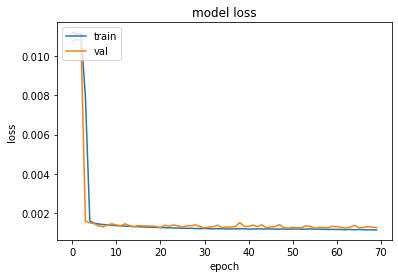

In [8]:
##################
# REPORTS
##################

reports.plotHistory( hist )

In [9]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Black image found
Black image found
Images count =2309
Best RMSENZ  =2157 (0.93)
Best MAENZ   =2156 (0.93)
Best Accuracy=2036 (0.88)
RMSE-NZ  Pred=0.0234  Noisy=0.0943
MAE-NZ   Pred=0.0198  Noisy=0.0904
PSNR     Pred=20.4 dB Noisy=9.3 dB
Accuracy Pred=0.41    Noisy=0.09
SSM      Pred=0.95    Noisy=0.66
HOG MSE  Pred=0.08    Noisy=0.12


Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test/
Noisy files:128
Nitid files:128
Index:0
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_0_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_0_nitid_idx134.tif


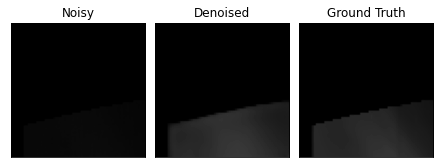

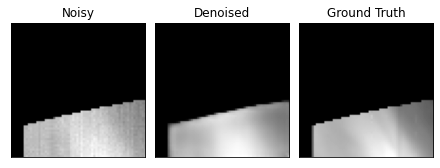

RMSE-NZ  Pred=0.0150  Noisy=0.1136 BEST
MAE-NZ   Pred=0.0085  Noisy=0.1102 BEST
PSNR     Pred=22.9 dB Noisy=5.3 dB BEST
Accuracy Pred=0.65    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.78
HOG MSE  Pred=0.09    Noisy=0.08
******************************************************
Index:1
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_10_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_10_nitid_idx134.tif


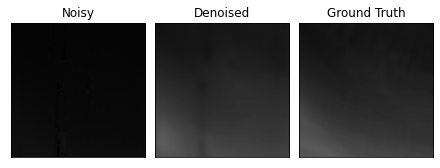

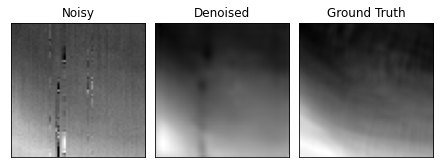

RMSE-NZ  Pred=0.0164  Noisy=0.1361 BEST
MAE-NZ   Pred=0.0139  Noisy=0.1225 BEST
PSNR     Pred=26.6 dB Noisy=8.2 dB BEST
Accuracy Pred=0.36    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.38
HOG MSE  Pred=0.07    Noisy=0.15
******************************************************
Index:2
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_11_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_11_nitid_idx134.tif


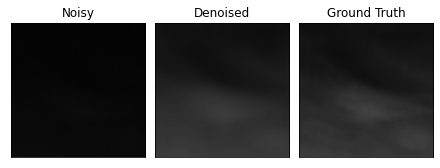

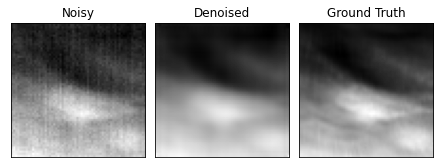

RMSE-NZ  Pred=0.0084  Noisy=0.1187 BEST
MAE-NZ   Pred=0.0066  Noisy=0.1077 BEST
PSNR     Pred=29.7 dB Noisy=6.8 dB BEST
Accuracy Pred=0.76    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.42
HOG MSE  Pred=0.04    Noisy=0.08
******************************************************
Index:3
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_12_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_12_nitid_idx134.tif


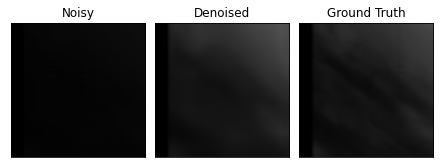

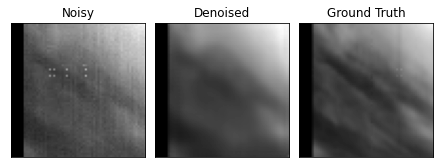

RMSE-NZ  Pred=0.0192  Noisy=0.0947 BEST
MAE-NZ   Pred=0.0149  Noisy=0.0830 BEST
PSNR     Pred=24.0 dB Noisy=10.1 dB BEST
Accuracy Pred=0.43    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.37
HOG MSE  Pred=0.05    Noisy=0.07
******************************************************
Index:4
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_13_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_13_nitid_idx134.tif


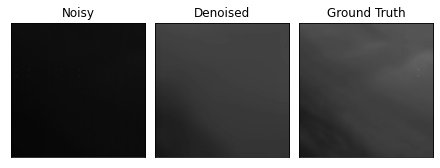

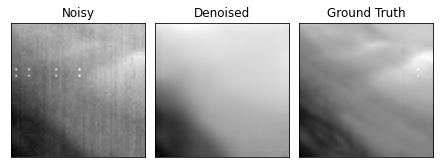

RMSE-NZ  Pred=0.0412  Noisy=0.2117 BEST
MAE-NZ   Pred=0.0349  Noisy=0.2063 BEST
PSNR     Pred=19.6 dB Noisy=5.4 dB BEST
Accuracy Pred=0.08    Noisy=0.00 BEST
SSM      Pred=0.95    Noisy=0.41
HOG MSE  Pred=0.07    Noisy=0.20
******************************************************
Index:5
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_14_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_14_nitid_idx134.tif


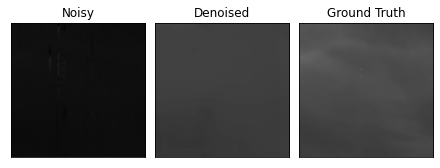

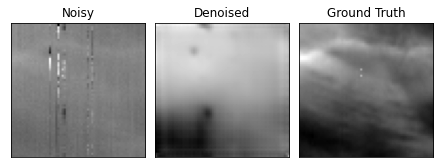

RMSE-NZ  Pred=0.0488  Noisy=0.2330 BEST
MAE-NZ   Pred=0.0454  Noisy=0.2317 BEST
PSNR     Pred=18.0 dB Noisy=4.5 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.43
HOG MSE  Pred=0.08    Noisy=0.10
******************************************************
Index:6
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_15_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_15_nitid_idx134.tif


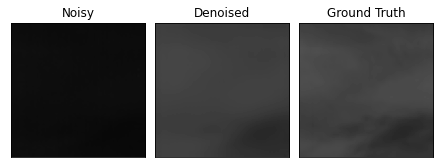

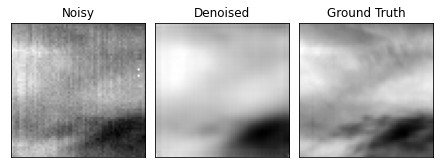

RMSE-NZ  Pred=0.0186  Noisy=0.2065 BEST
MAE-NZ   Pred=0.0151  Noisy=0.2048 BEST
PSNR     Pred=24.5 dB Noisy=3.6 dB BEST
Accuracy Pred=0.39    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.38
HOG MSE  Pred=0.04    Noisy=0.11
******************************************************
Index:7
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_1_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_1_nitid_idx134.tif


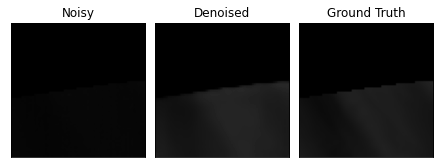

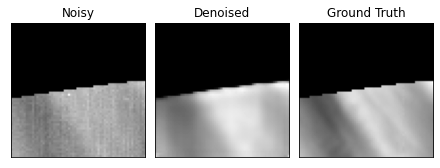

RMSE-NZ  Pred=0.0158  Noisy=0.0697 BEST
MAE-NZ   Pred=0.0113  Noisy=0.0669 BEST
PSNR     Pred=19.3 dB Noisy=6.4 dB BEST
Accuracy Pred=0.46    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.70
HOG MSE  Pred=0.09    Noisy=0.06
******************************************************
Index:8
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_2_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_2_nitid_idx134.tif


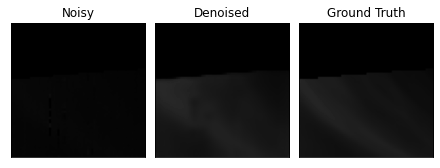

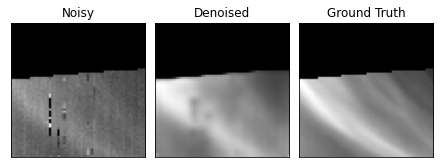

RMSE-NZ  Pred=0.0112  Noisy=0.0660 BEST
MAE-NZ   Pred=0.0075  Noisy=0.0626 BEST
PSNR     Pred=22.5 dB Noisy=7.1 dB BEST
Accuracy Pred=0.66    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.67
HOG MSE  Pred=0.09    Noisy=0.10
******************************************************
Index:9
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_3_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_3_nitid_idx134.tif


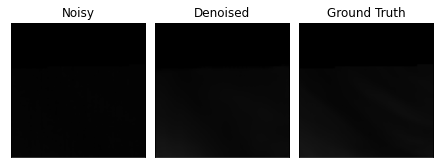

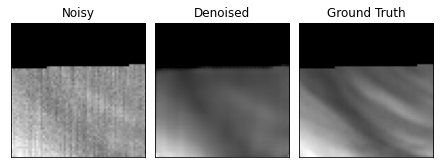

RMSE-NZ  Pred=0.0041  Noisy=0.0283 BEST
MAE-NZ   Pred=0.0024  Noisy=0.0260 BEST
PSNR     Pred=26.9 dB Noisy=10.1 dB BEST
Accuracy Pred=0.97    Noisy=0.01 BEST
SSM      Pred=0.99    Noisy=0.80
HOG MSE  Pred=0.07    Noisy=0.13
******************************************************
Index:10
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_4_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_4_nitid_idx134.tif


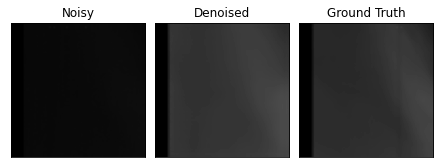

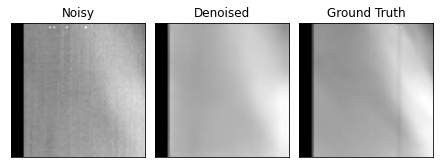

RMSE-NZ  Pred=0.0284  Noisy=0.1519 BEST
MAE-NZ   Pred=0.0258  Noisy=0.1492 BEST
PSNR     Pred=19.7 dB Noisy=5.1 dB BEST
Accuracy Pred=0.12    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.31
HOG MSE  Pred=0.05    Noisy=0.06
******************************************************
Index:11
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_5_nitid_idx134.tif


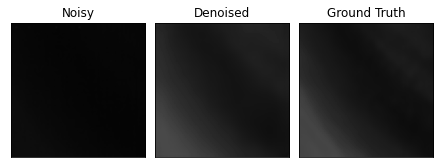

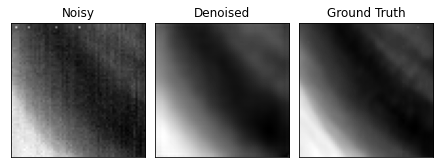

RMSE-NZ  Pred=0.0192  Noisy=0.0993 BEST
MAE-NZ   Pred=0.0181  Noisy=0.0857 BEST
PSNR     Pred=23.4 dB Noisy=9.1 dB BEST
Accuracy Pred=0.11    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.39
HOG MSE  Pred=0.02    Noisy=0.26
******************************************************
Index:12
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_6_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_6_nitid_idx134.tif


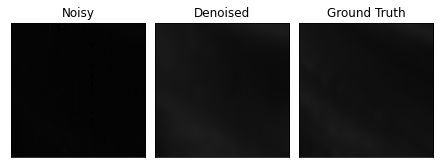

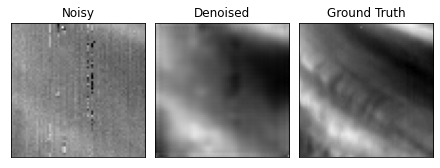

RMSE-NZ  Pred=0.0090  Noisy=0.0521 BEST
MAE-NZ   Pred=0.0073  Noisy=0.0506 BEST
PSNR     Pred=22.0 dB Noisy=6.8 dB BEST
Accuracy Pred=0.69    Noisy=0.00 BEST
SSM      Pred=0.99    Noisy=0.48
HOG MSE  Pred=0.02    Noisy=0.14
******************************************************
Index:13
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_7_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_7_nitid_idx134.tif


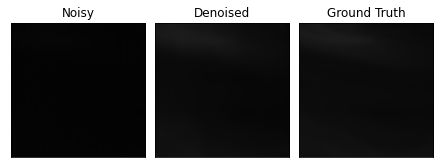

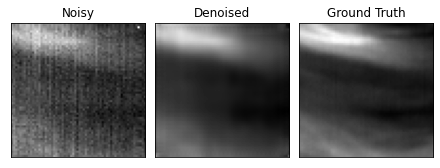

RMSE-NZ  Pred=0.0074  Noisy=0.0408 BEST
MAE-NZ   Pred=0.0064  Noisy=0.0387 BEST
PSNR     Pred=23.5 dB Noisy=8.7 dB BEST
Accuracy Pred=0.84    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.61
HOG MSE  Pred=0.04    Noisy=0.36
******************************************************
Index:14
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_8_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_8_nitid_idx134.tif


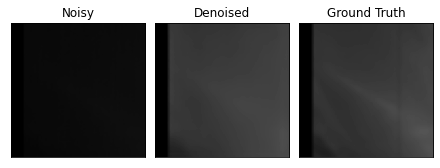

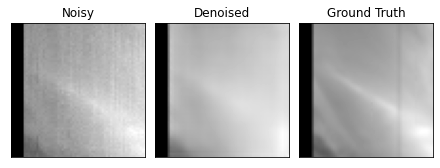

RMSE-NZ  Pred=0.0173  Noisy=0.1798 BEST
MAE-NZ   Pred=0.0147  Noisy=0.1769 BEST
PSNR     Pred=25.7 dB Noisy=5.3 dB BEST
Accuracy Pred=0.31    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.32
HOG MSE  Pred=0.03    Noisy=0.04
******************************************************
Index:15
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_9_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_9_nitid_idx134.tif


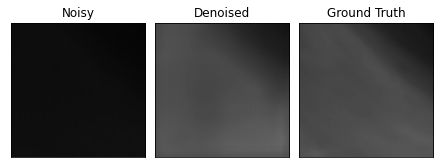

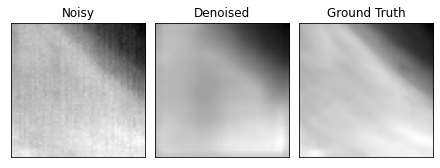

RMSE-NZ  Pred=0.0211  Noisy=0.2214 BEST
MAE-NZ   Pred=0.0173  Noisy=0.2154 BEST
PSNR     Pred=24.4 dB Noisy=4.0 dB BEST
Accuracy Pred=0.35    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.33
HOG MSE  Pred=0.05    Noisy=0.18
******************************************************
Index:16
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_0_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_0_nitid_idx134.tif


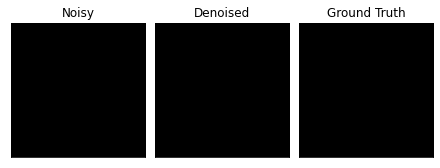

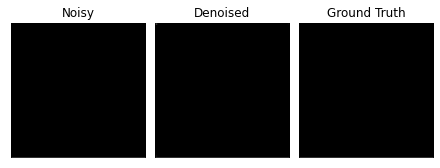

Black image. Cannot calculate accurayNoZeros


SystemExit: -1

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [10]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
test_noisy, test_nitid = dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )

In [ ]:
model.save(os.path.abspath(os.path.join('../../../saves/', SAVED_MODEL))